In [1]:
import math
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

from ema_workbench import save_results, load_results
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import clusterer, plotting, Density

#%matplotlib inline
clr_palette = ([sns.color_palette("YlGn", 15)[10],sns.cubehelix_palette(8)[6]])

pydice_folder = os.path.dirname(os.getcwd()) + '\\1_Model'
sys.path.append(pydice_folder)

from ema_workbench import (perform_experiments, Model, Policy, Scenario, ReplicatorModel, RealParameter, IntegerParameter, ScalarOutcome, ArrayOutcome, 
                           Constant, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, IpyparallelEvaluator)

from PyRICE_V8 import PyRICE

from matplotlib import pyplot

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [7]:
experiments_total = pd.read_csv("long_term_uncertainty_experiments_total_complete.csv")

In [8]:
experiments_total['policy_recoded']=experiments_total['principle'].astype(str).str[0:4] + "_"+ experiments_total['policy'] 

In [9]:
#combine growth factors
#experiments_total['growth factor'] = np.where(experiments_total['growth_factor_prio'] > 0,experiments_total['growth_factor_prio'] ,"else")
#experiments_total['growth factor'] = np.where(experiments_total['sufficitarian growth factor'] >0,experiments_total['sufficitarian growth factor'] ,"else")
#experiments['growth factor'] = np.where(experiments['growth factor'] =="else",0.0 ,experiments['growth factor'])

#combine discounting
experiments_total['discounting_method'] = ""
experiments_total['discounting_method'] = np.where(experiments_total['principle'] == "utilitarian" , experiments_total['irstp'], 0)
experiments_total['discounting_method'] = np.where(experiments_total['irstp'] > 0.005 , 0, 1)

experiments_total['discounting_method'] = np.where(experiments_total['prioritarian_discounting'] == 0, 2,experiments_total['discounting_method'])
experiments_total['discounting_method'] = np.where(experiments_total['prioritarian_discounting'] == 1, 3,experiments_total['discounting_method'])

experiments_total['discounting_method'] = np.where(experiments_total['sufficitarian_discounting'] == 0,4 ,experiments_total['discounting_method'])
experiments_total['discounting_method'] = np.where(experiments_total['sufficitarian_discounting'] == 1,5 ,experiments_total['discounting_method'])

experiments_total['discounting_method'] = np.where(experiments_total['egalitarian_discounting'] == 0, 6 ,experiments_total['discounting_method'])
experiments_total['discounting_method'] = np.where(experiments_total['egalitarian_discounting'] ==1, 7,experiments_total['discounting_method'])

#treshold level
experiments_total['treshold level'] = np.where(experiments_total['principle'] != "Sufficitarian"  , 0.7,experiments_total['treshold level'])

#principle
experiments_total['principle_recoded'] = 0
experiments_total['principle_recoded'] = np.where(experiments_total['principle'] == "Nordhaus policy" , int(4), experiments_total['principle_recoded'])
experiments_total['principle_recoded'] = np.where(experiments_total['principle'] == "Utilitarian" , int(0), experiments_total['principle_recoded'])
experiments_total['principle_recoded'] = np.where(experiments_total['principle'] == "Prioritarian" , int(1), experiments_total['principle_recoded'])
experiments_total['principle_recoded'] = np.where(experiments_total['principle'] == "Sufficitarian" , int(2), experiments_total['principle_recoded'])
experiments_total['principle_recoded'] = np.where(experiments_total['principle'] == "Egalitarian" , int(3), experiments_total['principle_recoded'])

In [10]:
experiments_total['temperature_label'] = ""

experiments_total['temperature_label'].mask((experiments_total['Atmospheric Temperature 2105'] > 4),"Extreme warming", inplace=True)
experiments_total['temperature_label'].mask((experiments_total['Atmospheric Temperature 2105'] < 4) &
                          (experiments_total['Atmospheric Temperature 2105'] > 2.5), "High warming", inplace=True)
experiments_total['temperature_label'].mask((experiments_total['Atmospheric Temperature 2105'] < 2.5) &
                          (experiments_total['Atmospheric Temperature 2105'] > 2), "Medium warming", inplace=True)
experiments_total['temperature_label'].mask((experiments_total['Atmospheric Temperature 2105'] < 2) &
                          (experiments_total['Atmospheric Temperature 2105'] > 1.5), "Moderate warming", inplace=True)
experiments_total['temperature_label'].mask((experiments_total['Atmospheric Temperature 2105'] < 1.5) &
                          (experiments_total['Atmospheric Temperature 2105'] > -.01), "Low warming", inplace=True)

# Plot utility levels and color with various forms of discounting methods

In [47]:
paraxes = parcoords.ParallelAxes(parcoords.get_limits(input_data), rot=0)
paraxes.fig.set_size_inches(15,6)
color_index = 0

for scenario in range(0,6):    
    for discounting_method in range (0,2):
        paraxes.plot(input_data[(input_data['Economic scenario']==scenario) & (input_data['discounting_method']==discounting_method+4)],
                     linewidth=2, color=sns.color_palette("Paired")[color_index+discounting_method], label='cluster '+str(scenario))
    color_index = scenario * 2
    
paraxes.legend()
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F110E581F0> (for post_execute):


KeyboardInterrupt: 

In [48]:
input_data = outcomes[outcomes["policy_recoded"].isin(['Suff_policy30','Suff_policy13'])]
input_data = input_data[input_data["principle"]=="Sufficitarian"][["Utility 2045","Utility 2075","Utility 2105","discounting_method"]]

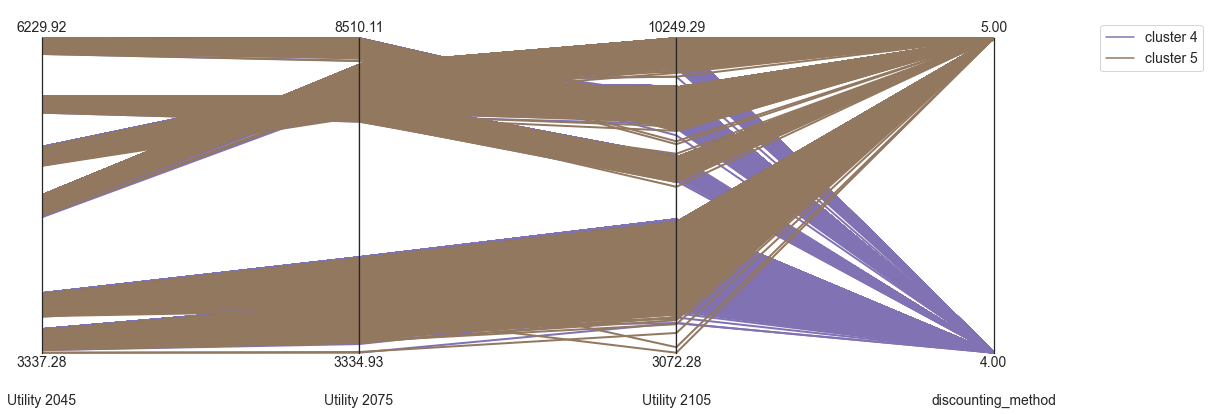

In [49]:
input_data = outcomes[outcomes["policy_recoded"].isin(['Suff_policy30','Suff_policy13'])]
input_data = input_data[input_data["principle"]=="Sufficitarian"][["Utility 2045","Utility 2075","Utility 2105","discounting_method"]]

paraxes = parcoords.ParallelAxes(parcoords.get_limits(input_data), rot=0)
paraxes.fig.set_size_inches(15,6)

for i in range(4,6):
    paraxes.plot(input_data[input_data['discounting_method']==i],linewidth=2, color=sns.color_palette()[i], label='cluster '+str(i))
paraxes.legend()
plt.show()

In [ ]:
pollimits = pd.DataFrame({"fdamage":[0,2],'t2xco2_index':[0,999],'t2xco2_dist':[0,2],'fosslim':[4000,13500],
                          'scenario_elasticity_of_damages':[0,2], 'scenario_pop_gdp':[0,5], 
                          'scenario_limmiu':[0, 1]})

uncertainties_parcoords = ['fdamage','t2xco2_dist',"t2xco2_index","scenario_elasticity_of_damages","fosslim",
                           'scenario_pop_gdp','scenario_limmiu','clusters']

objectives_list_timeseries_name =  ['Intratemporal utility GINI ','Intratemporal impact GINI ',
                                    'Utility ','Damages ','Lowest income per capita ',
                                    'Highest climate impact per capita ',
                                    'Population under treshold ','Distance to treshold ' ]

policy_list = ["Egal_policy36","Prio_policy28","Util_policy370","Suff_policy30"]

sns.set(font_scale=1.5, style='whitegrid')
for policy in policy_list:
    for objective in objectives_list_timeseries_name:
        df_to_plot = pd.read_csv("TSC_35k_" + objective + "_"+ policy + "_cluster_5.csv")
        df_to_plot = df_to_plot.iloc[:,1:]
        df_to_plot = df_to_plot.set_index(['policy'])
        df_to_plot = df_to_plot.drop(["model"],axis=1)
        df_to_plot['clusters'] = df_to_plot['clusters'].astype(object)
        
        parcoords_input_df_before_shape = df_to_plot[uncertainties_parcoords]        
        parcoords_input_df =parcoords_input_df_before_shape + np.random.rand(*parcoords_input_df_before_shape.shape) / 10
        parcoords_input_df['clusters'] = parcoords_input_df_before_shape

        paraxes = parcoords.ParallelAxes(parcoords.get_limits(pollimits), rot=0)
        paraxes.fig.set_size_inches(15,6)
            
        for i in range(len(parcoords_input_df['clusters'].unique())):
            paraxes.plot(parcoords_input_df.loc[parcoords_input_df.clusters == i],linewidth=2, color=sns.color_palette()[i], label='cluster '+str(i))
        paraxes.legend()
        #cf.change_fontsize(paraxes, fs=26)
        plt.show()
        
        #paraxes.fig.savefig("parcoords_uncertainties_"+policy+objective.png", bbox_inches='tight')

## Short term intergenerational trade-off: prioritarian

In [116]:
input_data = outcomes[outcomes["policy_recoded"].isin(['Prio_policy19'])]
input_data['temperature_label'] = ""

input_data['temperature_label'].mask((input_data['Atmospheric Temperature 2105'] > 5),"Extreme warming > 5 °C", inplace=True)
input_data['temperature_label'].mask((input_data['Atmospheric Temperature 2105'] < 5) &
                          (input_data['Atmospheric Temperature 2105'] > 3), "High warming 3 - 5 °C", inplace=True)
input_data['temperature_label'].mask((input_data['Atmospheric Temperature 2105'] < 3) &
                          (input_data['Atmospheric Temperature 2105'] > 2), "Medium warming 2 - 3 °C", inplace=True)
input_data['temperature_label'].mask((input_data['Atmospheric Temperature 2105'] < 2) &
                          (input_data['Atmospheric Temperature 2105'] > 1.5), "Low to moderate warming 0 - 2 °C", inplace=True)
input_data['temperature_label'].mask((input_data['Atmospheric Temperature 2105'] < 1.5) &
                          (input_data['Atmospheric Temperature 2105'] > -.01), "Low to moderate warming 0 - 2 °C", inplace=True)

<ipython-input-116-496edd3ce49b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['temperature_label'] = ""
C:\Users\ivart\anaconda3\lib\site-packages\pandas\core\generic.py:9279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(
C:\Users\ivart\anaconda3\lib\site-packages\pandas\core\generic.py:9279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return 

In [117]:
input_data['temperature_label'].unique().tolist()

['Low to moderate warming 0 - 2 °C',
 'Medium warming 2 - 3 °C',
 'High warming 3 - 5 °C']

In [118]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [119]:
input_data = input_data.rename({'Highest climate impact per capita 2005': 'Relative impact 2005'},axis=1) 
input_data = input_data.rename({'Highest climate impact per capita 2045': 'Relative impact 2045'},axis=1) 
input_data = input_data.rename({'Highest climate impact per capita 2105': 'Relative impact 2105'},axis=1) 

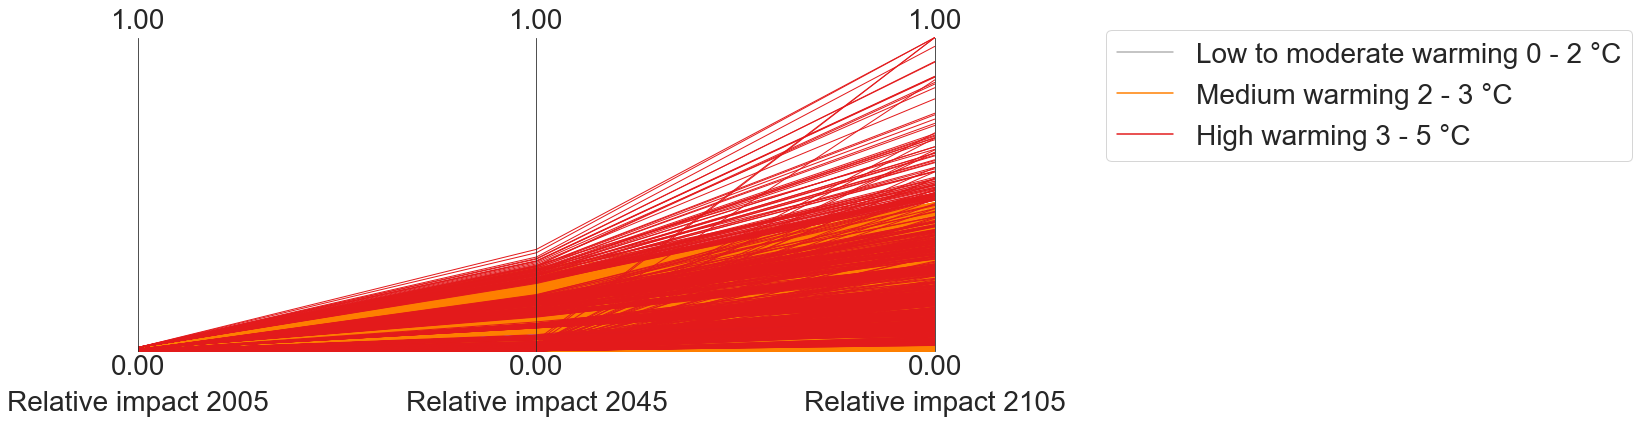

In [120]:
pollimits = pd.DataFrame({'Relative impact 2005':[0,1],
                          'Relative impact 2045':[0,1],
                          'Relative impact 2105':[0,1]})

outcome = ['Relative impact 2005','Relative impact 2045'
            ,'Relative impact 2105']

paraxes = parcoords.ParallelAxes(pollimits, rot=0,fontsize=28)
paraxes.fig.set_size_inches(15,6)

for label in input_data['temperature_label'].unique().tolist():
    if label == 'Low to moderate warming 0 - 2 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=1, color=sns.color_palette("Set2")[7], label=label)
    if label =='High warming 3 - 5 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=1, color=sns.color_palette("Paired")[5], label=label)
    if label == 'Medium warming 2 - 3 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=1, color=sns.color_palette("Paired")[7], label=label)
paraxes.legend()
paraxes.fig.savefig("short_term_intergen_trade_off_relative_impact.png", 
                    bbox_inches='tight',dpi = 200)
plt.show()



In [121]:
input_data = input_data.rename({'Lowest income per capita 2005': 'Worst-off income 2005'},axis=1) 
input_data = input_data.rename({'Lowest income per capita 2045': 'Worst-off income 2045'},axis=1) 
input_data = input_data.rename({'Lowest income per capita 2105': 'Worst-off income 2105'},axis=1) 

In [22]:
input_data

,Damages 2005,Damages 2015,Damages 2025,Damages 2035,Damages 2045,Damages 2055,Damages 2065,Damages 2075,Damages 2085,Damages 2095,...,Total Output 2105,Intertemporal utility GINI,Intertemporal impact GINI,Total Aggregated Utility,discounting_method,principle,policy,policy_recoded,Economic scenario,temperature_label
735000,0.087272,0.258565,0.570721,0.993761,1.425685,1.800917,2.086417,2.297575,2.472407,2.645621,...,250.604306,0.706932,0.765797,3654.012234,3,Prioritarian,policy19,Prio_policy19,3.0,Moderate warming
735001,0.220923,0.171414,0.000000,0.132860,0.000000,0.253436,0.000000,0.279602,0.000000,0.283521,...,389.260176,0.727057,0.862281,4214.391440,3,Prioritarian,policy19,Prio_policy19,2.0,Low warming
735002,0.001598,0.000902,0.001049,0.001539,0.002008,0.002412,0.002715,0.002974,0.003221,0.003425,...,388.196812,0.735913,0.747540,4043.145222,3,Prioritarian,policy19,Prio_policy19,1.0,Low warming
735003,0.001598,0.000904,0.002577,0.008366,0.024161,0.053776,0.088082,0.112910,0.125973,0.130041,...,701.126376,0.761538,0.817363,5119.003647,3,Prioritarian,policy19,Prio_policy19,5.0,Moderate warming
735004,0.001598,0.000876,0.002189,0.006195,0.015547,0.029146,0.036942,0.032184,0.021541,0.012055,...,472.914780,0.737037,0.813316,3810.063416,3,Prioritarian,policy19,Prio_policy19,0.0,Low warming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769995,0.001598,0.000876,0.001165,0.001764,0.002653,0.003651,0.004441,0.004966,0.005417,0.005891,...,506.915461,0.741379,0.772493,3877.199375,3,Prioritarian,policy19,Prio_policy19,0.0,Low warming
769996,0.001598,0.000904,0.001613,0.003438,0.007637,0.014677,0.021047,0.023610,0.023925,0.023381,...,687.911832,0.760483,0.793086,5091.210122,3,Prioritarian,policy19,Prio_policy19,5.0,Low warming
769997,0.087272,0.258565,0.552562,0.958517,1.382111,1.748303,2.000061,2.141329,2.219018,2.272945,...,240.331518,0.704023,0.757400,3669.171708,3,Prioritarian,policy19,Prio_policy19,3.0,Low warming
769998,0.220923,0.172177,0.423216,0.912280,1.634303,2.504758,3.366360,4.112222,4.726285,5.220426,...,699.320480,0.761619,0.799710,5102.244087,3,Prioritarian,policy19,Prio_policy19,5.0,Moderate warming


C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


Low to moderate warming 0 - 2 °C
Medium warming 2 - 3 °C
High warming 3 - 5 °C


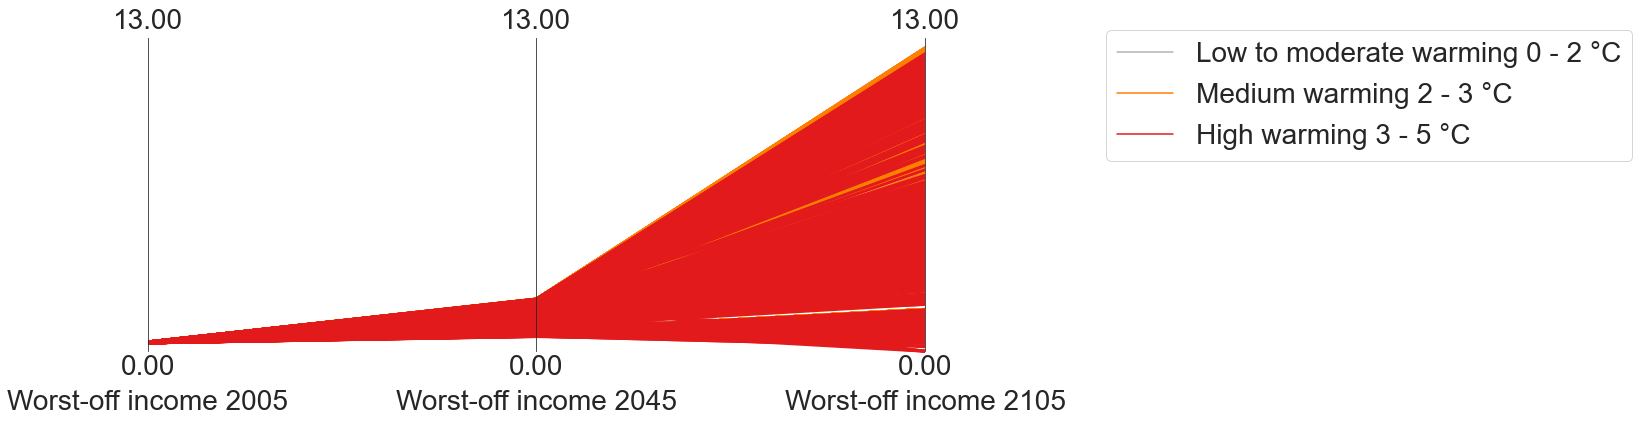

In [122]:
pollimits = pd.DataFrame({'Worst-off income 2005':[0,13],
                          'Worst-off income 2045':[0,13],
                          'Worst-off income 2105':[0,13]})

outcome = ['Worst-off income 2005','Worst-off income 2045','Worst-off income 2105',"discounting_method"]

paraxes = parcoords.ParallelAxes(pollimits, rot=0,fontsize=28)
paraxes.fig.set_size_inches(15,6)

for label in input_data['temperature_label'].unique().tolist():
    print(label)

    if label == 'Low to moderate warming 0 - 2 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=1, color=sns.color_palette("Set2")[7], label=label)
    if label =='High warming 3 - 5 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=3, color=sns.color_palette("Paired")[5], label=label)
    if label == 'Medium warming 2 - 3 °C':
        paraxes.plot(input_data[input_data['temperature_label']==label][outcome]
                     ,linewidth=3, color=sns.color_palette("Paired")[7], label=label)
        
paraxes.legend()
plt.show()
paraxes.fig.savefig("short_term_intergen_trade_off_consumption.png", 
                    bbox_inches='tight',dpi = 200)

# Long term trade-off in consumption

In [66]:
#label inequality in impact
input_data =  experiments_total[experiments_total["policy_recoded"].isin(['Egal_policy14','Egal_policy42'])]
outcome = ['Intratemporal utility GINI 2005','Intratemporal utility GINI 2105'
                         ,'Intratemporal utility GINI 2205','Intratemporal utility GINI 2305',"policy_recoded"]

input_data = input_data[outcome]
input_data['income_label'] = ""

input_data['income_label'].mask((input_data['Intratemporal utility GINI 2305'] > 0.40),"Constant inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal utility GINI 2305'] < 0.40) &
                          (input_data['Intratemporal utility GINI 2305'] > 0.30), "Slightly reduced inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal utility GINI 2305'] < 0.30) &
                          (input_data['Intratemporal utility GINI 2305'] > 0.2), "Reduced inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal utility GINI 2305'] < 0.2), "Very low inequality", inplace=True)

In [44]:
input_data['temperature_label'].unique().tolist()

['Low to moderate warming 0 - 2 °C',
 'Medium warming 2 - 3 °C',
 'High warming 3 - 5 °C']

In [67]:
input_data = input_data.rename({'Intratemporal utility GINI 2005': 'Utility GINI 2005'},axis=1) 
input_data = input_data.rename({'Intratemporal utility GINI 2105': 'Utility GINI 2105'},axis=1) 
input_data = input_data.rename({'Intratemporal utility GINI 2205': 'Utility GINI 2205'},axis=1) 
input_data = input_data.rename({'Intratemporal utility GINI 2305': 'Utility GINI 2305'},axis=1) 

outcome = ['Utility GINI 2005','Utility GINI 2105','Utility GINI 2205',
           'Utility GINI 2305',"policy_recoded"]

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


Very low inequality


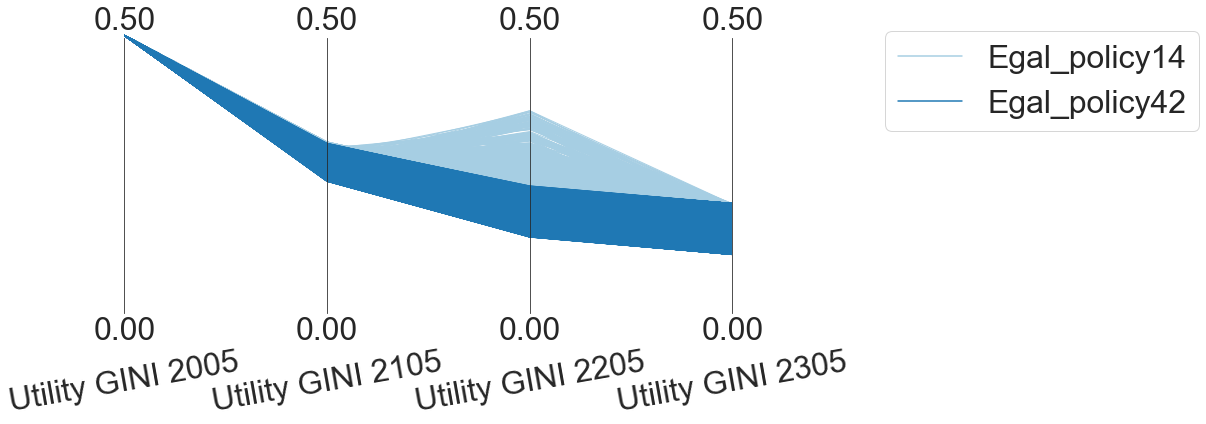

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


Reduced inequality


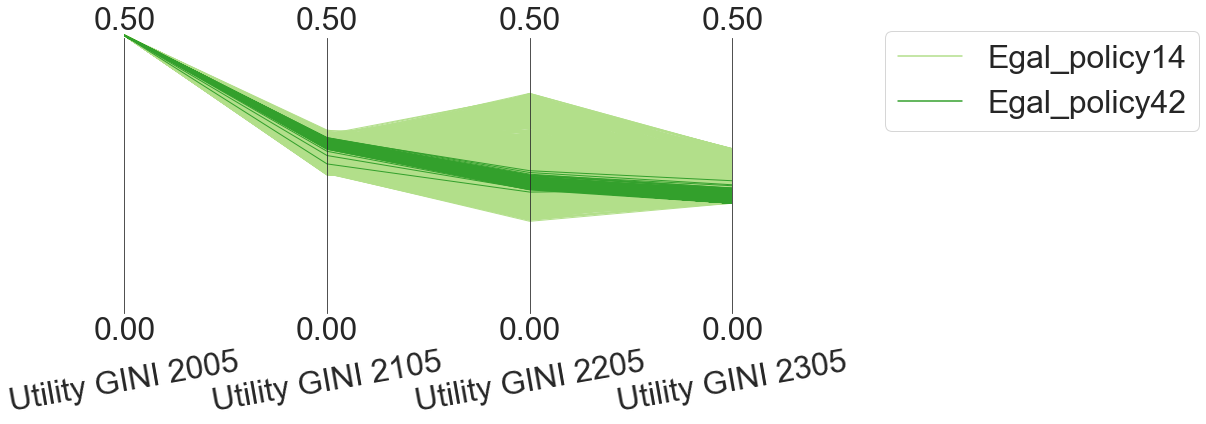

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


Slightly reduced inequality


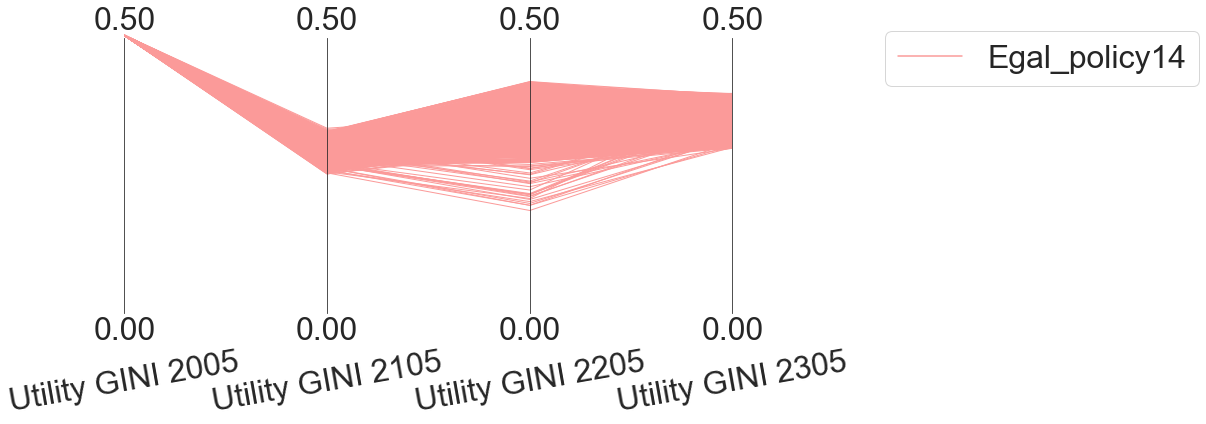

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


Constant inequality


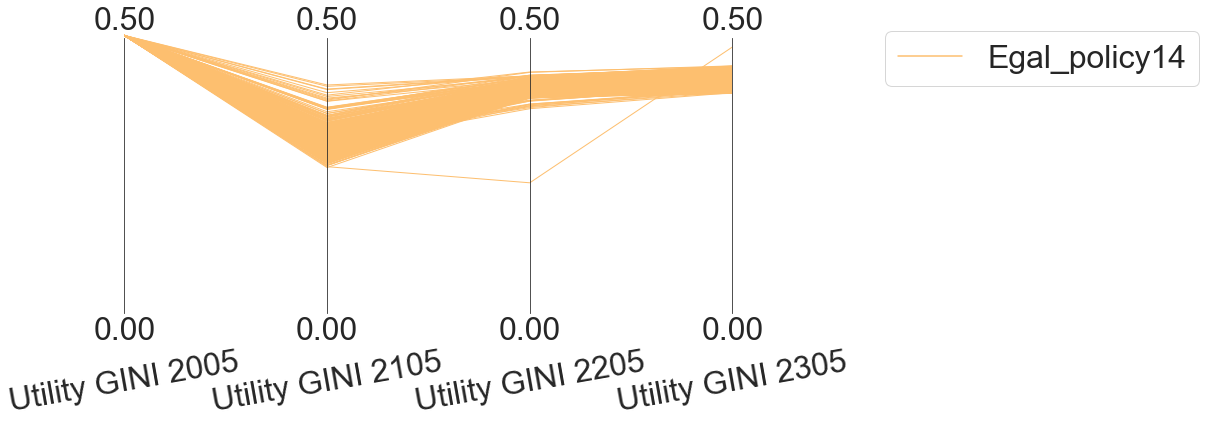

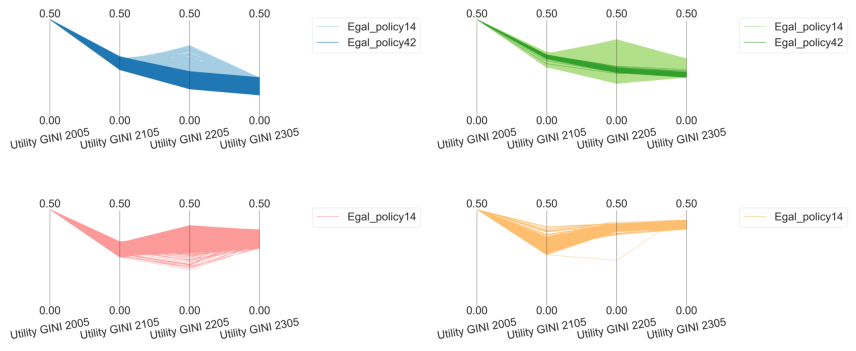

In [68]:
label_list = ['Very low inequality', 'Reduced inequality','Slightly reduced inequality', 'Constant inequality']
index = 0
for label in input_data['income_label'].unique().tolist():
    
    pollimits = pd.DataFrame({'Utility GINI 2005':[0,0.5],
                              'Utility GINI 2105':[0,0.5],
                              'Utility GINI 2205':[0,0.5],
                              'Utility GINI 2305':[0,0.5]})
    
    paraxes = parcoords.ParallelAxes(pollimits, rot=10,fontsize=32)
    paraxes.fig.set_size_inches(12,6)
    if label == label_list[0]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=(policy))
            policy_index = policy_index + 1
    if label == label_list[1]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=(policy))
            policy_index = policy_index + 1
    if label == label_list[2]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=(policy))
            policy_index = policy_index + 1
    if label == label_list[3]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=(policy))
            policy_index = policy_index + 1
                             
    print(label)
    paraxes.legend()
    plt.show()
    paraxes.fig.savefig("intergen_trade_off_analysis_inequality_in_consumption"+ str(index) + ".png", 
                        bbox_inches='tight',dpi = 200)
    index = index + 2

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(2, 2, figsize=(12, 6))

axarr[0,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption0.png'))
axarr[0,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption2.png'))
axarr[1,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption4.png'))
axarr[1,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption6.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

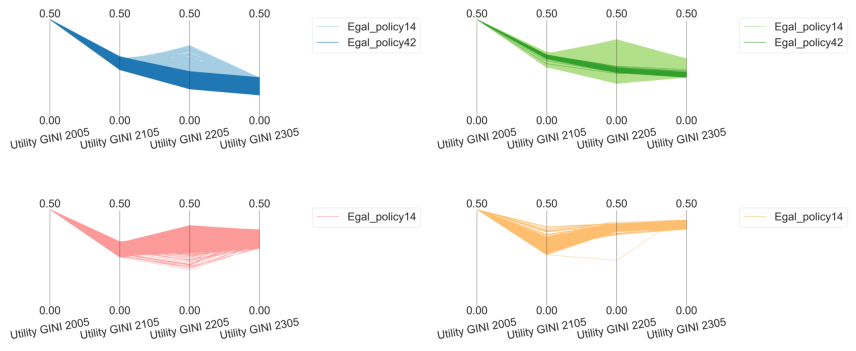

In [108]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(2, 2, figsize=(12, 6))

axarr[0,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption0.png'))
axarr[0,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption2.png'))
axarr[1,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption4.png'))
axarr[1,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_consumption6.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("intergen_trade_off_analysis_inequality_in_consumption_complete.png",dpi=200,bbox_inches="tight")

# Long term inequality in impact

In [69]:
#label inequality in impact
input_data =  experiments_total[experiments_total["policy_recoded"].isin(['Egal_policy14','Egal_policy42'])]
outcome = ['Intratemporal impact GINI 2005','Intratemporal impact GINI 2105'
                         ,'Intratemporal impact GINI 2205','Intratemporal impact GINI 2305','policy_recoded']

input_data = input_data[outcome]

input_data['income_label'] = ""
input_data['income_label'].mask((input_data['Intratemporal impact GINI 2305'] > 0.8),"Very high impact inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal impact GINI 2305'] < 0.8) &
                          (input_data['Intratemporal impact GINI 2305'] > 0.5), "High impact inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal impact GINI 2305'] < 0.5) &
                          (input_data['Intratemporal impact GINI 2305'] > 0.2), "Medium impact inequality", inplace=True)
input_data['income_label'].mask((input_data['Intratemporal impact GINI 2305'] < 0.2), "Low impact inequality", inplace=True)

In [70]:
input_data = input_data.rename({'Intratemporal impact GINI 2005': 'Impact GINI 2005'},axis=1) 
input_data = input_data.rename({'Intratemporal impact GINI 2105': 'Impact GINI 2105'},axis=1) 
input_data = input_data.rename({'Intratemporal impact GINI 2205': 'Impact GINI 2205'},axis=1) 
input_data = input_data.rename({'Intratemporal impact GINI 2305': 'Impact GINI 2305'},axis=1) 

outcome = ['Impact GINI 2005','Impact GINI 2105','Impact GINI 2205',
           'Impact GINI 2305',"policy_recoded"]

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


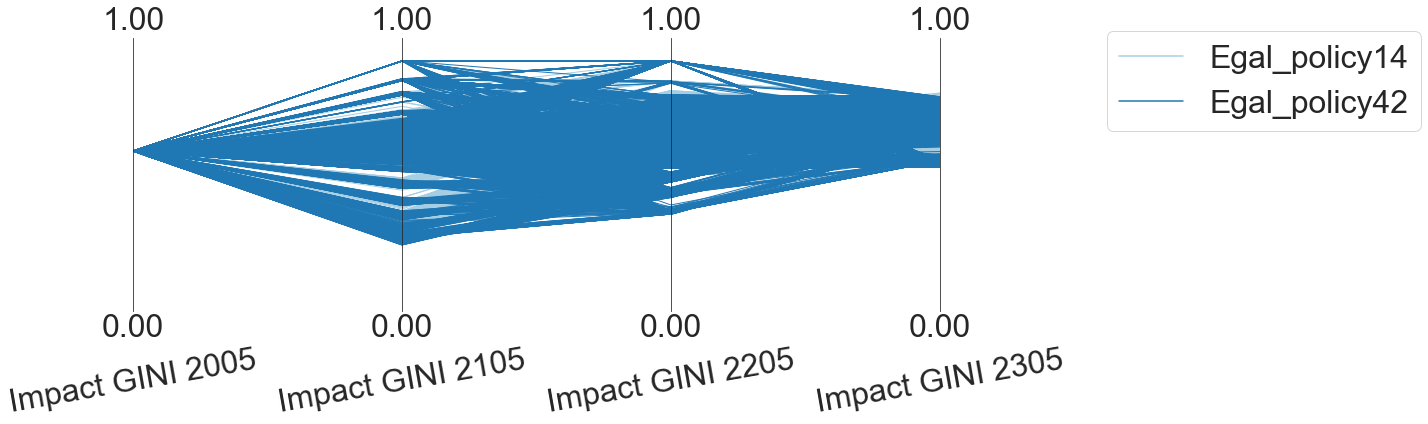

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


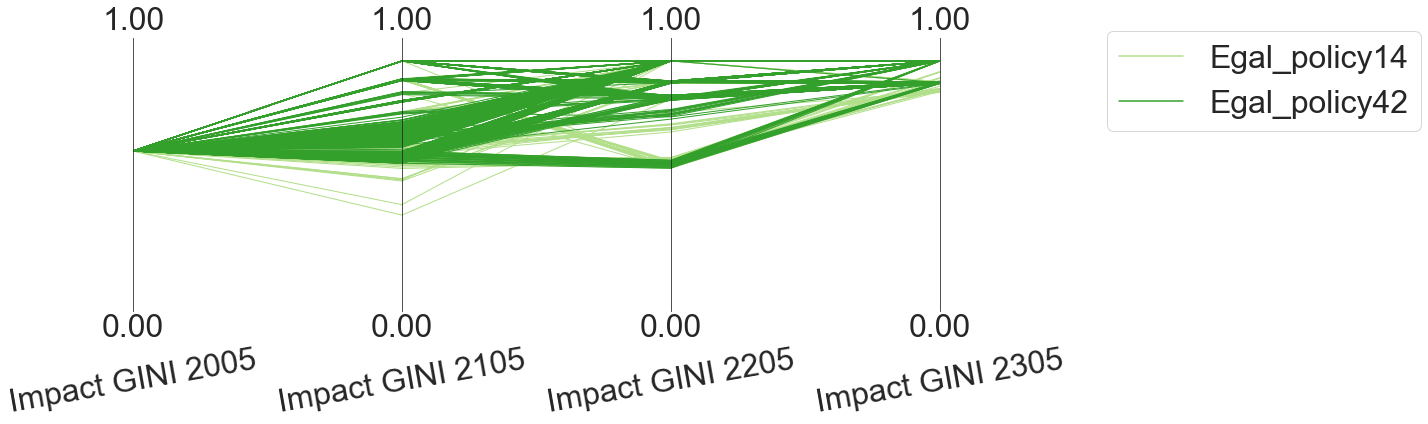

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


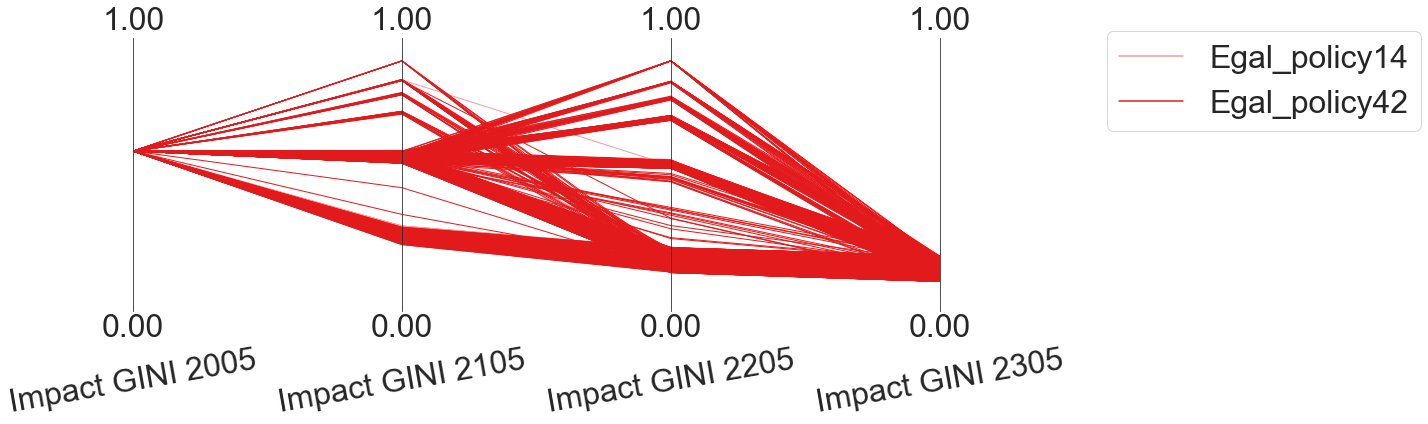

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


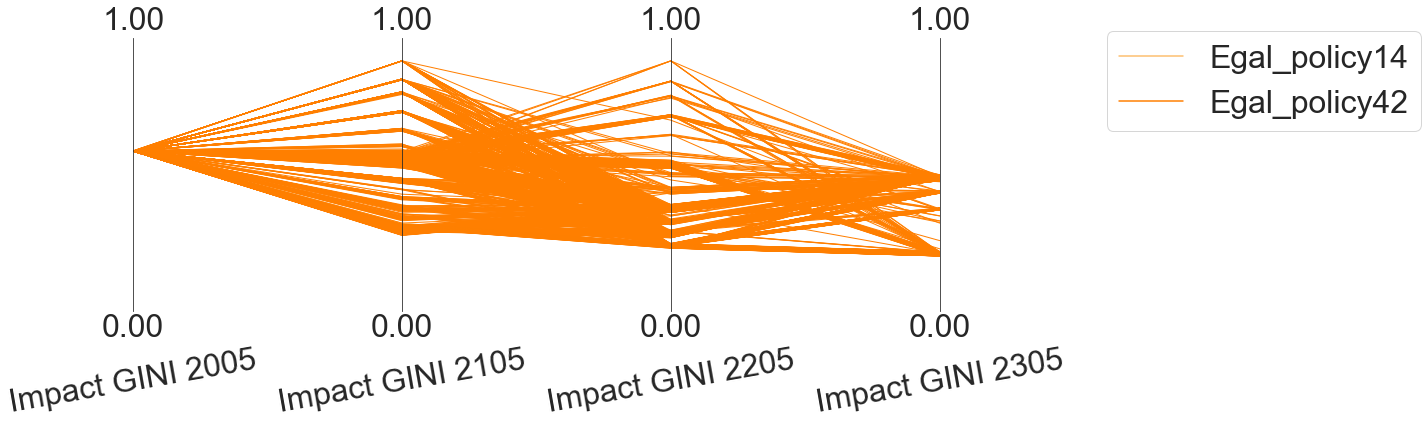

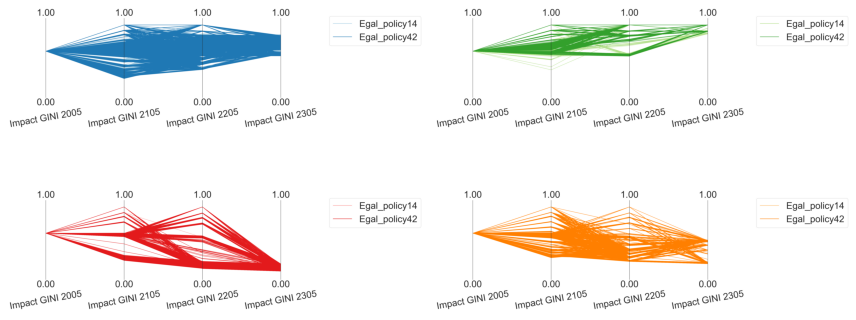

In [71]:
#outcome = ['Lowest income per capita 2005','Lowest income per capita 2105'
#                         ,'Lowest income per capita 2205','Lowest income per capita 2305',"income_label"]

label_list = ['Low impact inequality', "Medium impact inequality","High impact inequality", "Very high impact inequality"]
index = 0
for label in input_data['income_label'].unique().tolist():
    pollimits = pd.DataFrame({'Impact GINI 2005':[0,1],
                          'Impact GINI 2105':[0,1],
                          'Impact GINI 2205':[0,1],
                          'Impact GINI 2305':[0,1]})
    paraxes = parcoords.ParallelAxes(pollimits, rot=10,fontsize=32)
    paraxes.fig.set_size_inches(15,6)
    if label == label_list[0]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=policy)
            policy_index = policy_index + 1
    if label == label_list[1]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=policy)
            policy_index = policy_index + 1
    if label == label_list[2]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=policy)
            policy_index = policy_index + 1
    if label == label_list[3]:
        policy_index = 0
        for policy in ['Egal_policy14','Egal_policy42']:
            empty_check = input_data[(input_data['income_label']==label) 
                           & (input_data['policy_recoded']==policy)].empty
            if empty_check != True:
                paraxes.plot(input_data[(input_data['income_label']==label) & (input_data['policy_recoded']==policy)][outcome[0:4]]
                             ,linewidth=1, color = sns.color_palette("Paired")[index + policy_index], label=policy)
            policy_index = policy_index + 1
    paraxes.legend()    
    plt.show()
    paraxes.fig.savefig("intergen_trade_off_analysis_inequality_in_impact_"+ str(index) + ".png", 
                        bbox_inches='tight',dpi = 200)
    index = index + 2

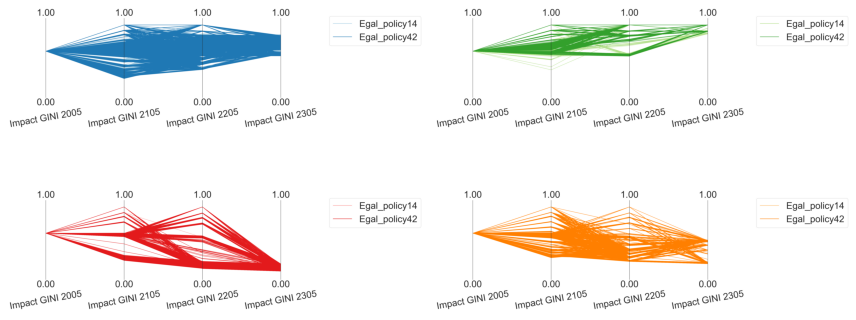

In [109]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(2, 2, figsize=(12, 6))

axarr[0,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_impact_0.png'))
axarr[0,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_impact_2.png'))
axarr[1,0].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_impact_4.png'))
axarr[1,1].imshow(mpimg.imread('intergen_trade_off_analysis_inequality_in_impact_6.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("intergen_trade_off_analysis_inequality_in_impact_complete.png",dpi=200,bbox_inches="tight")

# Long term trade-offs prioritarian

In [103]:
input_data =  experiments_total[experiments_total["policy_recoded"].isin(['Prio_policy19'])]
outcome = ['Lowest income per capita 2005','Lowest income per capita 2105'
                         ,'Lowest income per capita 2205','Lowest income per capita 2305']

input_data = input_data[outcome]

input_data['income_label'] = ""

input_data['income_label'].mask((input_data['Lowest income per capita 2305'] > 40),"Very high growth", inplace=True)
input_data['income_label'].mask((input_data['Lowest income per capita 2305'] < 40) &
                          (input_data['Lowest income per capita 2305'] > 20), "High growth", inplace=True)
input_data['income_label'].mask((input_data['Lowest income per capita 2305'] < 20) &
                          (input_data['Lowest income per capita 2305'] > 10), "Medium growth", inplace=True)
input_data['income_label'].mask((input_data['Lowest income per capita 2305'] < 10) &
                          (input_data['Lowest income per capita 2305'] > 2.5), "Low growth", inplace=True)
input_data['income_label'].mask((input_data['Lowest income per capita 2305'] < 2.5) &
                          (input_data['Lowest income per capita 2305'] > -.01), "Stagnation", inplace=True)

input_data.columns = ['Worst-off 2005','Worst-off 2105','Worst-off 2205'
                      ,'Worst-off 2305','income_label']

outcome = ['Worst-off 2005','Worst-off 2105','Worst-off 2205','Worst-off 2305','income_label']

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


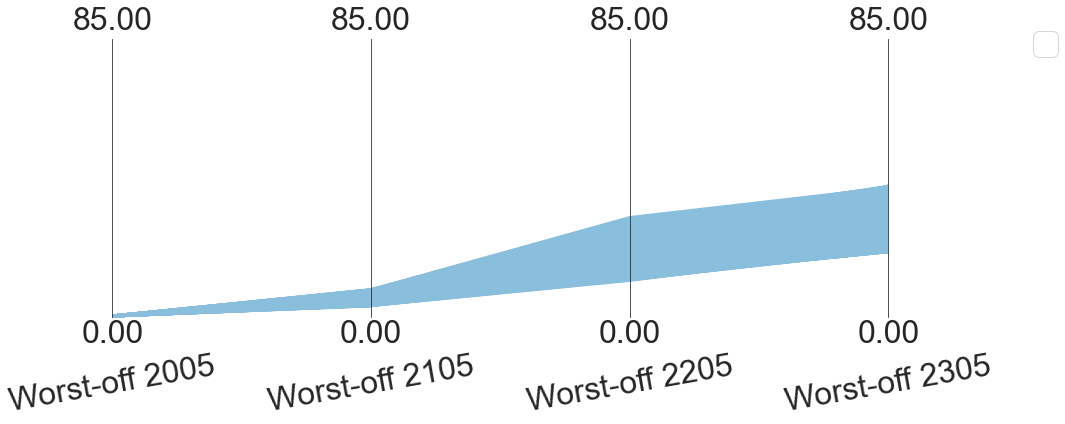

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


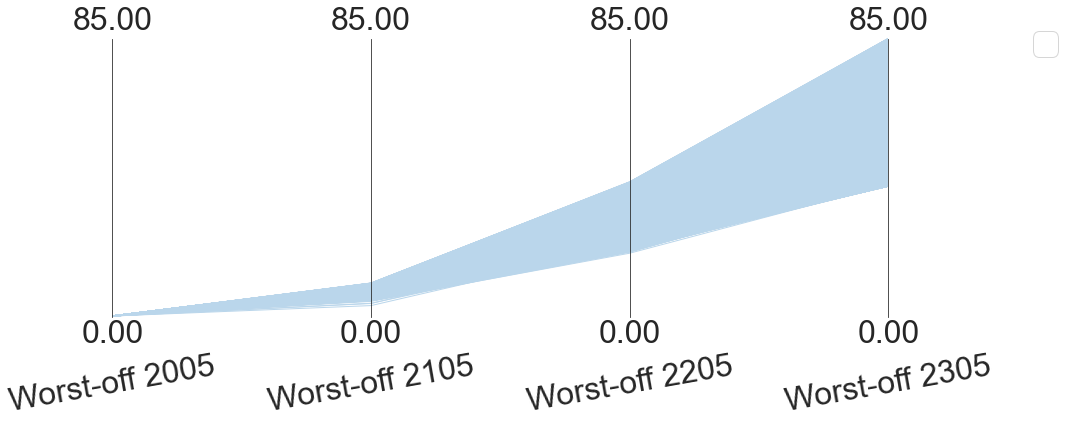

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


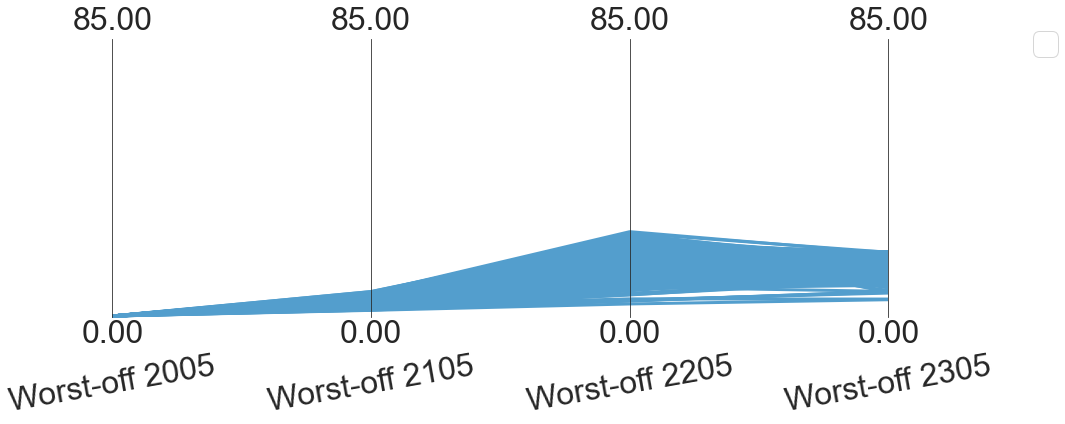

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


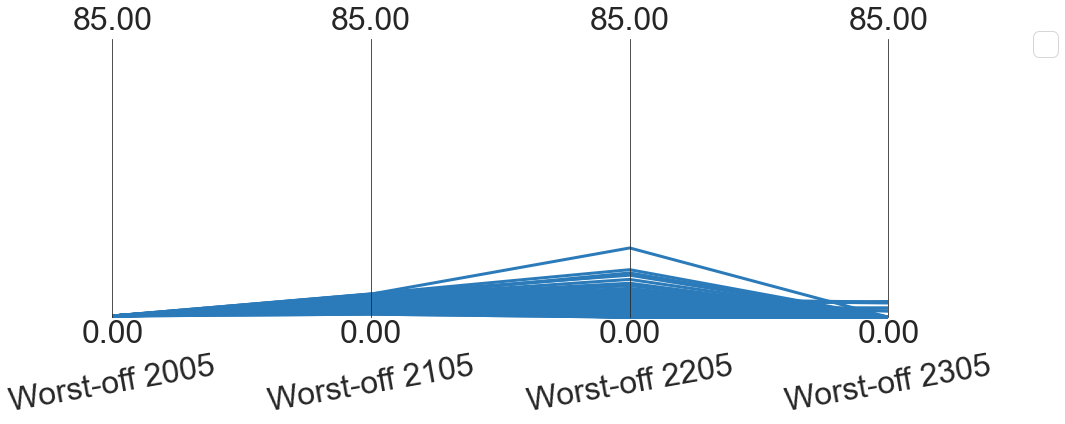

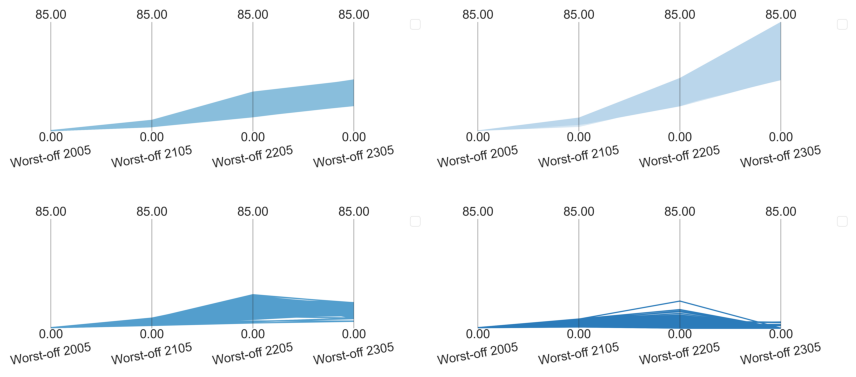

In [78]:
label_list = ["High growth","Medium growth","Low growth","Stagnation"]
index = 1
for label in input_data['income_label'].unique().tolist():
    pollimits = pd.DataFrame({'Worst-off 2005':[0,85],
                              'Worst-off 2105':[0,85],
                              'Worst-off 2205':[0,85],
                              'Worst-off 2305':[0,85]})
    
    paraxes = parcoords.ParallelAxes(pollimits, rot=10,fontsize=32)
    paraxes.fig.set_size_inches(14,6)
    if label == "High growth" :
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1, color = sns.color_palette("Blues")[1])
    if label =="Medium growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("Blues")[2])
    if label =="Low growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("Blues")[3])
    if label == 'Stagnation':
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("Blues")[4])
    paraxes.legend()    
    plt.show()
    paraxes.fig.savefig("intergen_trade_off_analysis__worst_off_income_class_"+ str(index) + ".png", 
                        bbox_inches='tight',dpi = 200)
    index = index + 1

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(2, 2, figsize=(12, 6))

axarr[0,0].imshow(mpimg.imread('intergen_trade_off_analysis__worst_off_income_class_1.png'))
axarr[0,1].imshow(mpimg.imread('intergen_trade_off_analysis__worst_off_income_class_2.png'))
axarr[1,0].imshow(mpimg.imread('intergen_trade_off_analysis__worst_off_income_class_3.png'))
axarr[1,1].imshow(mpimg.imread('intergen_trade_off_analysis__worst_off_income_class_4.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

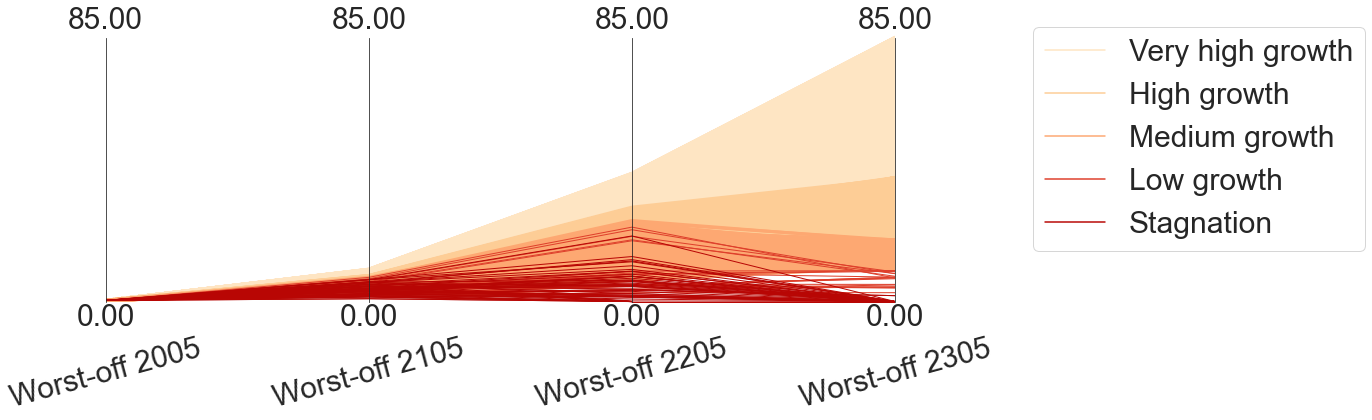

In [104]:
#paraxes = parcoords.ParallelAxes(parcoords.get_limits(input_data.iloc[:,0:4]), rot=0,fontsize=18)
#paraxes.fig.set_size_inches(15,6)

label_list = ["Very high growth","High growth","Medium growth","Low growth","Stagnation"]
pollimits = pd.DataFrame({'Worst-off 2005':[0,85],
                          'Worst-off 2105':[0,85],
                          'Worst-off 2205':[0,85],
                          'Worst-off 2305':[0,85]})

paraxes = parcoords.ParallelAxes(pollimits, rot=15,fontsize=30)
paraxes.fig.set_size_inches(14,6)

for label in label_list:    
    if label == "Stagnation":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1,color = sns.color_palette("OrRd")[5], label=label)      
    if label == "Low growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1, color = sns.color_palette("OrRd")[4], label=label)
    if label =="Medium growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[2], label=label)
    if label =="High growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[1], label=label)
    if label =="Very high growth":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[0], label=label)

paraxes.legend()
plt.show()

paraxes.fig.savefig("worst_off_intergen_trade_off_compolete.png", bbox_inches='tight',dpi = 200)

# Relative climate impact

In [105]:
input_data =  experiments_total[experiments_total["policy_recoded"].isin(['Prio_policy19'])]
outcome = ['Highest climate impact per capita 2005','Highest climate impact per capita 2105','Highest climate impact per capita 2205',
          'Highest climate impact per capita 2305']

input_data = input_data[outcome]

input_data['income_label'] = ""

input_data['income_label'].mask((input_data['Highest climate impact per capita 2305'] > 0.6),"Very high loss", inplace=True)
input_data['income_label'].mask((input_data['Highest climate impact per capita 2305'] < 0.6) &
                          (input_data['Highest climate impact per capita 2305'] > 0.3), "High loss", inplace=True)

input_data['income_label'].mask((input_data['Highest climate impact per capita 2305'] < 0.3) &
                          (input_data['Highest climate impact per capita 2305'] > 0.15), "Medium loss", inplace=True)

input_data['income_label'].mask((input_data['Highest climate impact per capita 2305'] < 0.15) &
                          (input_data['Highest climate impact per capita 2305'] > 0.05), "Low loss", inplace=True)

input_data['income_label'].mask((input_data['Highest climate impact per capita 2305'] < 0.05), "No loss", inplace=True)

input_data.columns = ['Relative impact 2005','Relative impact 2105','Relative impact 2205'
                      ,'Relative impact 2305','income_label']

outcome = ['Relative impact 2005','Relative impact 2105','Relative impact 2205','Relative impact 2305']

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


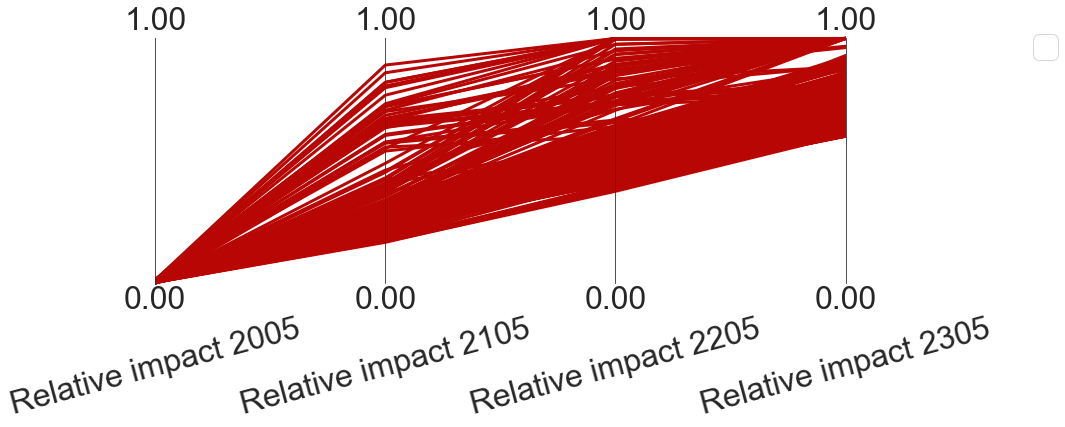

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


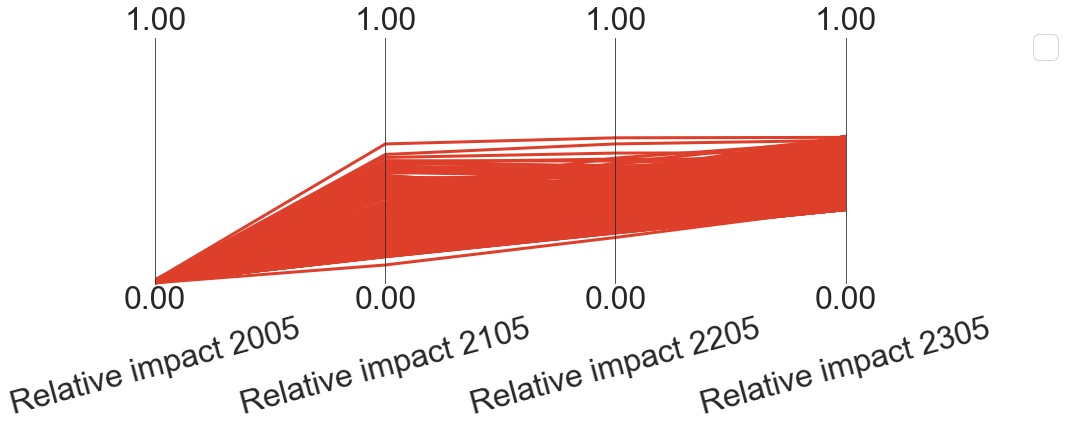

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


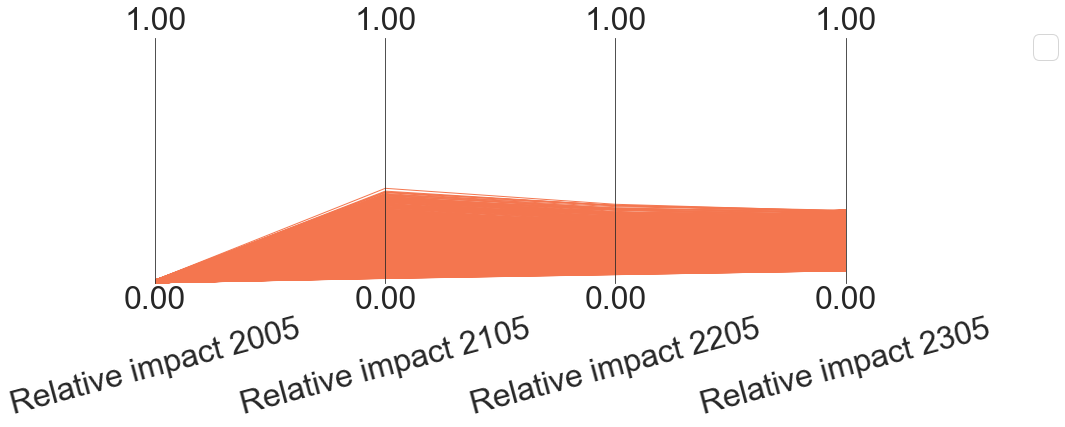

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


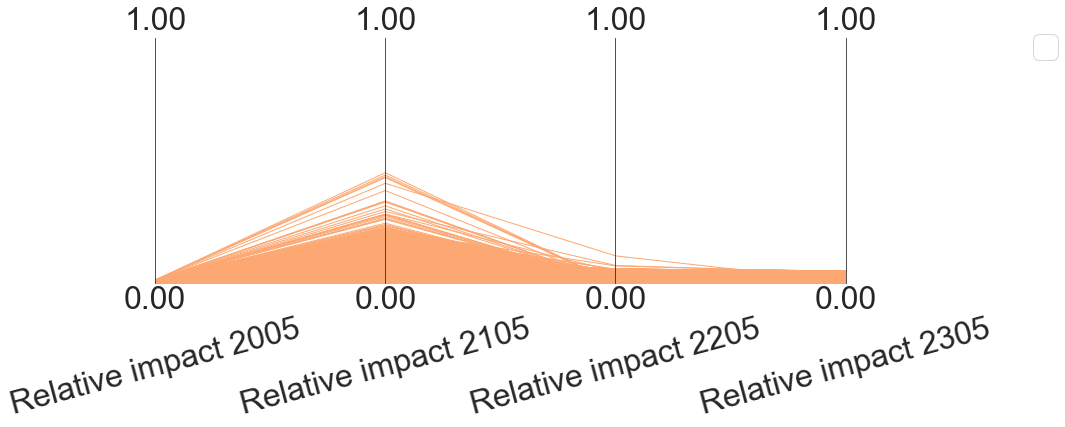

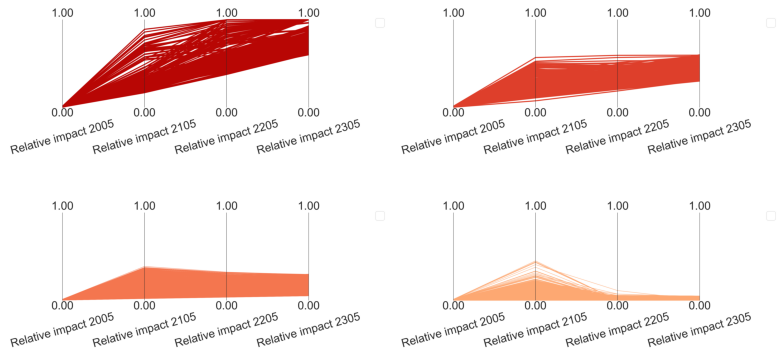

In [83]:
#paraxes = parcoords.ParallelAxes(parcoords.get_limits(input_data.iloc[:,0:4]), rot=0,fontsize=18)
#paraxes.fig.set_size_inches(15,6)

label_list = ["High loss","Medium loss","Low loss","No loss"]
index = 1

for label in label_list:
    
    pollimits = pd.DataFrame({'Relative impact 2005':[0,1],
                              'Relative impact 2105':[0,1],
                              'Relative impact 2205':[0,1],
                              'Relative impact 2305':[0,1]})

    paraxes = parcoords.ParallelAxes(pollimits, rot=15,fontsize=32)
    paraxes.fig.set_size_inches(14,6)
    
    if label == "No loss" :
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1,color = sns.color_palette("OrRd")[2])      
    if label == "Low loss" :
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1, color = sns.color_palette("OrRd")[3])
    if label =="Medium loss":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[4])
    if label =="High loss":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[5])
    paraxes.legend()    
    plt.show()
    
    paraxes.fig.savefig("intergen_trade_off_analysis__relative_climate_impact_" + str(index) + ".png", 
                        bbox_inches='tight',dpi = 200)
    index = index + 1

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(3, 2, figsize=(11, 6))

axarr[0,0].imshow(mpimg.imread('intergen_trade_off_analysis__relative_climate_impact_1.png'))
axarr[0,1].imshow(mpimg.imread('intergen_trade_off_analysis__relative_climate_impact_2.png'))
axarr[1,0].imshow(mpimg.imread('intergen_trade_off_analysis__relative_climate_impact_3.png'))
axarr[1,1].imshow(mpimg.imread('intergen_trade_off_analysis__relative_climate_impact_4.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

C:\Users\ivart\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


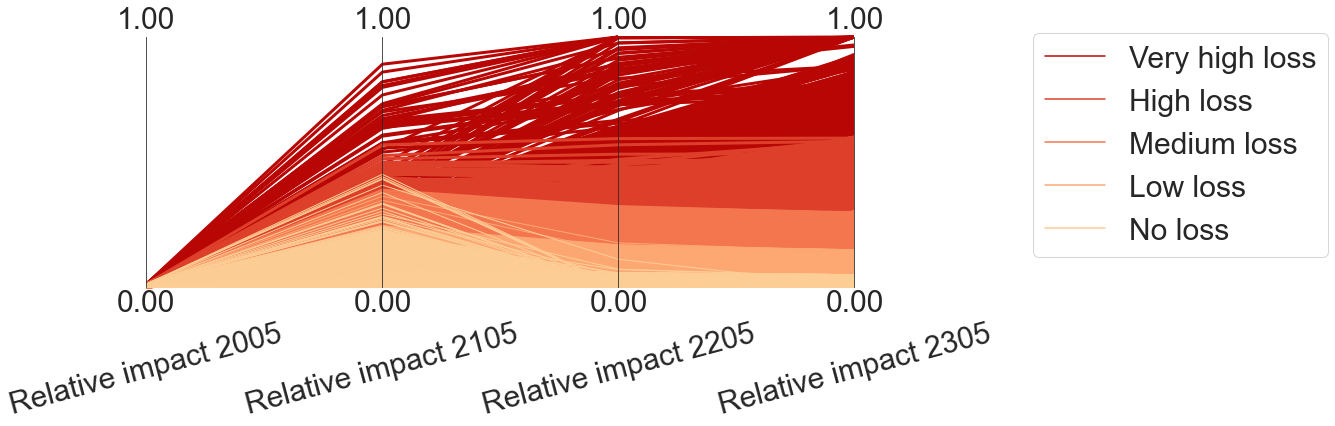

In [106]:
#paraxes = parcoords.ParallelAxes(parcoords.get_limits(input_data.iloc[:,0:4]), rot=0,fontsize=18)
#paraxes.fig.set_size_inches(15,6)

label_list = ["Very high loss","High loss" ,"Medium loss","Low loss","No loss"]

pollimits = pd.DataFrame({'Relative impact 2005':[0,1],
                          'Relative impact 2105':[0,1],
                          'Relative impact 2205':[0,1],
                          'Relative impact 2305':[0,1]})

paraxes = parcoords.ParallelAxes(pollimits, rot=15,fontsize=30)
paraxes.fig.set_size_inches(14,6)

for label in label_list:    
    if label == "No loss" :
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1,color = sns.color_palette("OrRd")[1], label=label)      
    if label == "Low loss" :
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=1, color = sns.color_palette("OrRd")[2], label=label)
    if label =="Medium loss":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[3], label=label)
    if label =="High loss":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[4], label=label)
    if label =="Very high loss":
        paraxes.plot(input_data[input_data['income_label']==label][outcome]
                     ,linewidth=3, color = sns.color_palette("OrRd")[5], label=label)

paraxes.legend()
plt.show()
paraxes.fig.savefig("relative_impact_worst_off_intergen_trade_off_complete.png", bbox_inches='tight',dpi = 200)